In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "plantvillages",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

(32, 256, 256, 3)
[1 1 1 1 0 1 0 1 0 0 1 2 1 1 0 0 0 2 1 1 1 1 1 1 0 2 0 1 0 1 0 0]
(32, 256, 256, 3)
[1 1 1 1 0 1 0 1 0 0 1 2 1 1 0 0 0 2 1 1 1 1 1 1 0 2 0 1 0 1 0 0]
(32, 256, 256, 3)
[1 1 1 1 0 1 0 1 0 0 1 2 1 1 0 0 0 2 1 1 1 1 1 1 0 2 0 1 0 1 0 0]
(32, 256, 256, 3)
[1 1 1 1 0 1 0 1 0 0 1 2 1 1 0 0 0 2 1 1 1 1 1 1 0 2 0 1 0 1 0 0]
(32, 256, 256, 3)
[1 1 1 1 0 1 0 1 0 0 1 2 1 1 0 0 0 2 1 1 1 1 1 1 0 2 0 1 0 1 0 0]
(32, 256, 256, 3)
[1 1 1 1 0 1 0 1 0 0 1 2 1 1 0 0 0 2 1 1 1 1 1 1 0 2 0 1 0 1 0 0]
(32, 256, 256, 3)
[1 1 1 1 0 1 0 1 0 0 1 2 1 1 0 0 0 2 1 1 1 1 1 1 0 2 0 1 0 1 0 0]
(32, 256, 256, 3)
[1 1 1 1 0 1 0 1 0 0 1 2 1 1 0 0 0 2 1 1 1 1 1 1 0 2 0 1 0 1 0 0]
(32, 256, 256, 3)
[1 1 1 1 0 1 0 1 0 0 1 2 1 1 0 0 0 2 1 1 1 1 1 1 0 2 0 1 0 1 0 0]
(32, 256, 256, 3)
[1 1 1 1 0 1 0 1 0 0 1 2 1 1 0 0 0 2 1 1 1 1 1 1 0 2 0 1 0 1 0 0]
(32, 256, 256, 3)
[1 1 1 1 0 1 0 1 0 0 1 2 1 1 0 0 0 2 1 1 1 1 1 1 0 2 0 1 0 1 0 0]
(32, 256, 256, 3)
[1 1 1 1 0 1 0 1 0 0 1 2 1 1 0 0 0 2 1 1 1 1 1 1 0 2 0 1 0

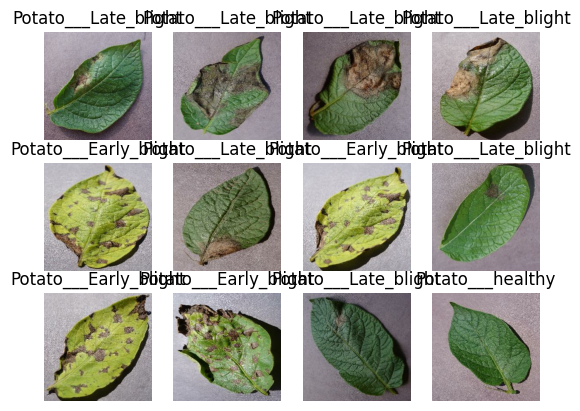

In [6]:
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        print(image_batch.shape)
        print(label_batch.numpy())
        plt.axis("off")

In [7]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [8]:
train_ds = dataset.take(54)
len(train_ds)

54

In [9]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [10]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [11]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [12]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [13]:
def get_dataset_partition_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    train_size = int(train_split * ds_size)
    val_size = int(val_split* ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [14]:
len(train_ds)

54

In [15]:
len(val_ds)

6

In [16]:
len(test_ds)

8

In [17]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [24]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [25]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [27]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes,activation='softmax')
])
model.build(input_shape=input_shape)

In [28]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_3 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [29]:
model.compile(
optimizer='adam',
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics=['accuracy']
)

In [30]:
history = model.fit(
train_ds,
epochs=EPOCHS,
batch_size=BATCH_SIZE,
verbose=1,
validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 212s 4s/step - loss: 0.8754 - accuracy: 0.5139 - val_loss: 0.8136 - val_accuracy: 0.6146
Epoch 2/50
54/54 [==============================] - 213s 4s/step - loss: 0.5792 - accuracy: 0.7442 - val_loss: 0.7607 - val_accuracy: 0.6146
Epoch 3/50
54/54 [==============================] - 195s 4s/step - loss: 0.3360 - accuracy: 0.8628 - val_loss: 0.3658 - val_accuracy: 0.8542
Epoch 4/50
54/54 [==============================] - 196s 4s/step - loss: 0.3049 - accuracy: 0.8727 - val_loss: 0.3140 - val_accuracy: 0.8802
Epoch 5/50
54/54 [==============================] - 139s 3s/step - loss: 0.2506 - accuracy: 0.8958 - val_loss: 0.4697 - val_accuracy: 0.8281
Epoch 6/50
54/54 [==============================] - 111s 2s/step - loss: 0.2120 - accuracy: 0.9109 - val_loss: 0.3976 - val_accuracy: 0.8646
Epoch 7/50
54/54 [==============================] - 110s 2s/step - loss: 0.2059 - accuracy: 0.9109 - val_loss: 0.3687 - val_accuracy: 0.8802
Epoch 8/50
54

54/54 [==============================] - 115s 2s/step - loss: 0.0423 - accuracy: 0.9832 - val_loss: 0.1582 - val_accuracy: 0.9583
Epoch 42/50
54/54 [==============================] - 117s 2s/step - loss: 0.0354 - accuracy: 0.9884 - val_loss: 0.2559 - val_accuracy: 0.9427
Epoch 43/50
54/54 [==============================] - 118s 2s/step - loss: 0.0199 - accuracy: 0.9959 - val_loss: 0.1253 - val_accuracy: 0.9635
Epoch 44/50
54/54 [==============================] - 117s 2s/step - loss: 0.0056 - accuracy: 0.9988 - val_loss: 0.1968 - val_accuracy: 0.9531
Epoch 45/50
54/54 [==============================] - 123s 2s/step - loss: 0.0173 - accuracy: 0.9959 - val_loss: 0.2409 - val_accuracy: 0.9323
Epoch 46/50
54/54 [==============================] - 112s 2s/step - loss: 0.0191 - accuracy: 0.9954 - val_loss: 0.0760 - val_accuracy: 0.9792
Epoch 47/50
54/54 [==============================] - 127s 2s/step - loss: 0.0123 - accuracy: 0.9965 - val_loss: 0.0997 - val_accuracy: 0.9792
Epoch 48/50
54/54 

In [31]:
scores = model.evaluate(test_ds)
scores

8/8 [==============================] - 6s 398ms/step - loss: 0.0923 - accuracy: 0.9612


[0.09229125082492828, 0.9612069129943848]

In [32]:
history

In [33]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

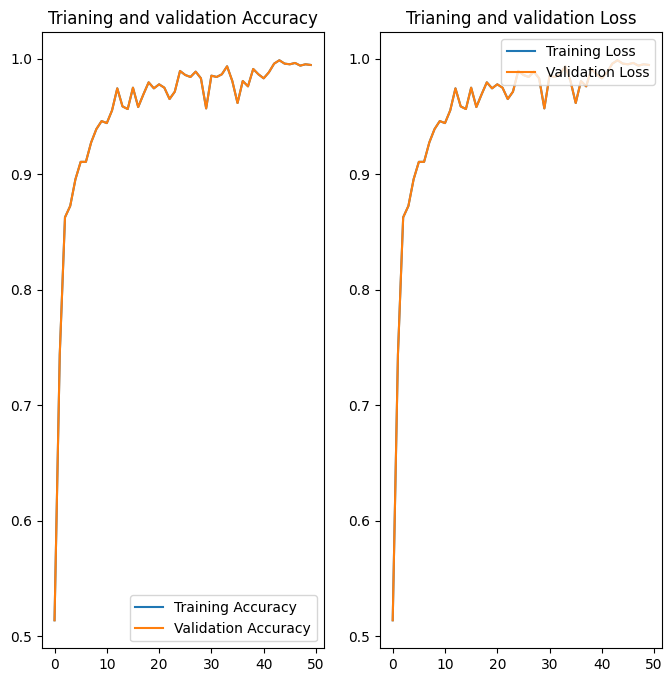

In [38]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Trianing and validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),acc,label='Training Loss')
plt.plot(range(EPOCHS),acc,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Trianing and validation Loss')
plt.show()

first image to predict
first image's actual label: Potato___Early_blight
1/1 [==============================] - 1s 1s/step
0


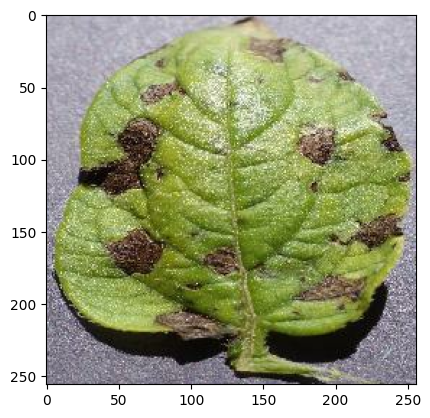

In [41]:
import numpy as np
for image_batch,labels_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label:",class_names[first_label])
    batch_prediction = model.predict(image_batch)
    print(np.argmax(batch_prediction[0]))

In [42]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predictions = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence

AttributeError: module 'keras.api._v2.keras.preprocessing' has no attribute 'image_to_array'

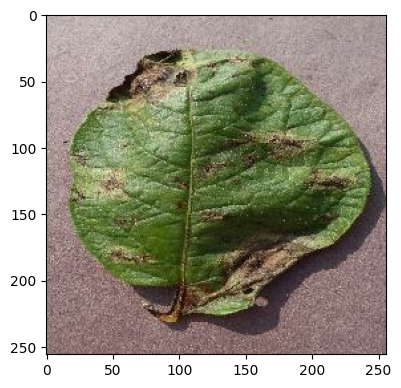

In [45]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

In [ ]:
import os
model_version = max([int(i) for i in os.listdir("../models")+[0]])+1
model.save(f"../models/{model_version}")